In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
pd.options.display.max_columns = None

# Questions
* How much money are Airbnb home owners earning / month?
* How does Airbnb home availability vary throughout the year?
* What's the average availability of Airbnb homes throughout the year?
* How do prices of Airbnb homes differ across neighbourhoods?
* What factors influence the price of an Airbnb home? Can be predict such prices?
* How do room types vary throughout the different neighbourhoods?
* Can we use image classification to predict Airbnb rates?
* Can we predict positive and negative reviews based on their text?

# Import Data Sets

In [165]:
# Import calendar data
df_calendar = pd.read_csv('/Users/patrick.peltier/Documents/Udacity Data Science Nanodegree/Data/Airbnb/calendar_berlin.csv')
print(df_calendar.shape)
display(df_calendar.head())

(8238780, 4)


,listing_id,date,available,price
0,55298,2019-09-11,t,$88.00
1,170652,2019-09-11,t,$43.00
2,170652,2019-09-10,t,$43.00
3,170652,2019-09-09,t,$43.00
4,170652,2019-09-08,t,$43.00


### Exploring Average Availability of Listing

In [166]:
# Cast "available" column to binary numeric
df_calendar["available"] = df_calendar["available"].apply(lambda x: 1 if x == "t" else 0)
df_calendar["available"].describe()

count    8.238780e+06
mean     2.193391e-01
std      4.137989e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: available, dtype: float64

In [170]:
df_calendar_1[df_calendar_1["listing_id"] == 55298][["listing_id", "available"]].groupby("listing_id", as_index=False).sum()

,listing_id,available
0,55298,365


In [167]:
# Cast "price" column to int
df_calendar["price"] = df_calendar["price"].astype(str)
df_calendar["price"] = df_calendar["price"].apply(lambda x: x.replace('$','').replace(',',''))
df_calendar["price"] = df_calendar["price"].astype(float)
df_calendar["price"].describe()

count    1.807087e+06
mean     8.185733e+01
std      1.553349e+02
min      9.000000e+00
25%      3.900000e+01
50%      5.900000e+01
75%      9.000000e+01
max      8.002000e+03
Name: price, dtype: float64

In [168]:
# Add "month" column
df_calendar["month"] = df_calendar["date"].astype(str).str[:7]
df_calendar["month"].value_counts()

2019-07    699732
2018-12    699732
2019-05    699732
2018-10    699732
2019-08    699732
2019-01    699732
2019-03    699732
2019-04    677160
2018-11    677160
2019-06    677160
2019-02    632016
2018-09    428868
2019-09    248292
Name: month, dtype: int64

In [169]:
df_calendar_1 = df_calendar[df_calendar["available"] == 1]
availability = df_calendar_1[["listing_id", "month", "price"]].groupby(["listing_id", "month"], as_index=False).mean()
availability.head()

,listing_id,month,price
331,55298,2018-09,88.0
332,55298,2018-10,88.0
333,55298,2018-11,88.0
334,55298,2018-12,88.0
335,55298,2019-01,88.0
336,55298,2019-02,88.0
337,55298,2019-03,88.0
338,55298,2019-04,88.0
339,55298,2019-05,88.0
340,55298,2019-06,88.0


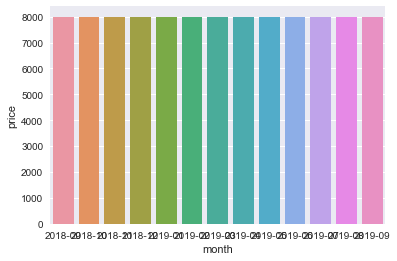

In [134]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.barplot(x="month", y="price", data=availability[["month", "price"]].groupby("month", as_index=False).max())

In [159]:
# Minimum income
print(3.96 * 4 * 60)
# Income with extra guests
print(3.96 * 4 * (60 + (4-1)*28))

950.4
2280.96


In [172]:
# Import listing data
df_listings = pd.read_csv('/Users/patrick.peltier/Documents/Udacity Data Science Nanodegree/Data/Airbnb/listings_berlin.csv')
print(df_listings.shape)
display(df_listings.head())

(22572, 96)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20180912025131,2018-09-12,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,6 weeks ago,t,5,34,64,154,2018-09-12,109,2016-04-11,2018-09-08,92.0,9.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,3.69
1,2695,https://www.airbnb.com/rooms/2695,20180912025131,2018-09-12,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$15.00,1,$15.00,2,40,a week ago,t,1,1,1,1,2018-09-12,4,2018-07-04,2018-09-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.69
2,3176,https://www.airbnb.com/rooms/3176,20180

In [136]:
# Cast "price" column to int
df_listings["price"] = df_listings["price"].astype(str)
df_listings["price"] = df_listings["price"].apply(lambda x: x.replace('$','').replace(',',''))
df_listings["price"] = df_listings["price"].astype(float)
df_listings["price"].describe()

count    22572.000000
mean        65.157673
std        204.781655
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

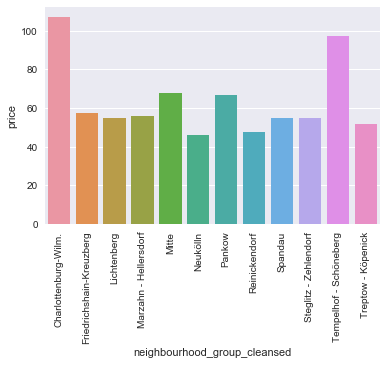

In [157]:
# Average 
neighbourhood_prices = df_listings[["neighbourhood_group_cleansed", "price"]]
neighbourhood_prices = neighbourhood_prices.groupby("neighbourhood_group_cleansed", as_index=False).mean()
sns.set(style="darkgrid")
ax = sns.barplot(x="neighbourhood_group_cleansed",
                 y="price",
                 data=neighbourhood_prices)
plt.xticks(rotation=90);

In [40]:
# Import review data
df_reviews = pd.read_csv('/Users/patrick.peltier/Documents/Udacity Data Science Nanodegree/Data/Airbnb/reviews_berlin.csv')
print(df_reviews.shape)
df_reviews.head()

(380952, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."
